## ReTap - UPDRS-Tapping Assessment - Feature Exploration

This notebooks helps to visualise and statistically tst created tapping-features.



### 0. Loading packages and functions, defining paths



In [1]:
# Importing Python and external packages
import os
import sys
import importlib
import pandas as pd
import numpy as np
import sklearn as sk
import scipy
import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec



In [2]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
# print('mne_bids', mne_bids.__version__)
# print('mne', mne.__version__)
print('sci-py', scipy.__version__)
print('sci-kit learn', sk.__version__)


## developed with:
# Python sys 3.9.7 (default, Sep 16 2021, 08:50:36) 
# [Clang 10.0.0 ]
# pandas 1.3.4
# numpy 1.20.3
# mne_bids 0.9
# mne 0.24.1
# sci-py 1.7.1
# sci-kit learn 1.0.1

## Currently (own env) since 31.08.22
# Python sys 3.9.12 (main, Jun  1 2022, 06:36:29) 
# [Clang 12.0.0 ]
# pandas 1.4.3
# numpy 1.21.5
# sci-py 1.7.3
# sci-kit learn 1.1.1

Python sys 3.9.13 (main, Oct 13 2022, 21:23:06) [MSC v.1916 64 bit (AMD64)]
pandas 1.4.4
numpy 1.23.3
sci-py 1.9.1
sci-kit learn 1.1.2


In [3]:
# own data preprocessing functions
# import tap_load_data.updrsTapping_import as tap_import
# import tap_load_data.tapping_preprocess as tap_preproc
# import tap_load_data.tapping_find_blocks as find_blocks
# import tap_load_data.tapping_impact_finder as tap_impact
# import tap_load_data.tapping_time_detect as tap_times


# ft extraction
# import tap_extract_fts.tapping_featureset as tap_fts_set
# import tap_extract_fts.tapping_extract_features as tap_ft_extr
import tap_extract_fts.tapping_postFeatExtr_calc as postExtrCalc

# own helper functions
import retap_utils.utils_dataManagement as utils_dataMn
# from tap_extract_fts import main_featExtractionClass as mainFtExtr

### Load or creating tapping-traces

In [4]:
### IMPORT CREATED CLASSES FROM FILES
from tap_extract_fts.main_featExtractionClass import FeatureSet, singleTrace

# importlib.reload(mainFtExtr)
# importlib.reload(utils_dataMn))

deriv_path = os.path.join(utils_dataMn.get_local_proj_dir(), 'data', 'derivatives')

# berClass = utils_dataManagement.load_class_pickle(os.path.join(deriv_path, 'ftClass_bertest.P'))
# dusClass = utils_dataManagement.load_class_pickle(os.path.join(deriv_path, 'ftClass_DUS.P'))

ftClass = utils_dataMn.load_class_pickle(os.path.join(deriv_path, 'ftClass_ALL_20221214.P'))
ftClass10 = utils_dataMn.load_class_pickle(os.path.join(deriv_path, 'ftClass_ALL_max10_20221214.P'))

In [4]:
### CREATE DATA-FT CLASSES in NOTEBOOK

# importlib.reload(mainFtExtr)
# importlib.reload(tap_run)
# importlib.reload(utils_dataManagement)
# importlib.reload(tap_import)
# importlib.reload(tap_preproc)
# importlib.reload(find_blocks)
# importlib.reload(tap_impact)
# importlib.reload(tap_times)
# importlib.reload(tap_fts_set)
# importlib.reload(tap_ft_extr)





# dusdata = mainFtExtr.FeatureSet(
#     subs_incl = ['DUS024',],# 'DUS007'],
#     centers_incl = [ 'DUS', ],
#     verbose=False,
# )

# nantest = mainFtExtr.FeatureSet(
#     subs_incl = ['BER019', 'BER019'],# 'DUS007'],
#     centers_incl = [ 'BER', ],
#     verbose=False,
# )


<module 'tap_load_data.tapping_time_detect' from '/Users/jeroenhabets/Research/CHARITE/projects/tapping/code/updrsTapping_repo/tap_load_data/tapping_time_detect.py'>

### 2a. Visualise detected Taps

In [66]:
print(ftClass.incl_traces[::30])
print()
print(vars(ftClass.BER019_M0S0_L_3.fts).keys())

['BER021_M0S1_L_1', 'BER029_M1S0_L_3', 'BER051_M1S0_L_1', 'BER038_M0S0_L_3', 'BER049_M0S0_R_1', 'BER028_M1S0_L_1', 'BER033_M1S1_R_1', 'BER023_M1S0_R_2', 'BER025_M0S1_R_1', 'BER024_M1S1_L_2', 'BER032_M0S0_L_2', 'DUS008_M0S0_L_1', 'DUS025_M1S0_L_1']

dict_keys(['triax_arr', 'fs', 'impacts', 'tapDict', 'updrsSubScore', 'nTaps', 'freq', 'tap_durations', 'intraTapInt', 'tapRMS', 'tapRMSnrm', 'impactRMS', 'raise_velocity', 'jerkiness_taps', 'jerkiness_trace', 'mean_tapRMS', 'coefVar_tapRMS', 'IQR_tapRMS', 'decr_tapRMS', 'slope_tapRMS', 'mean_tapRMSnrm', 'coefVar_tapRMSnrm', 'IQR_tapRMSnrm', 'decr_tapRMSnrm', 'slope_tapRMSnrm', 'mean_impactRMS', 'coefVar_impactRMS', 'IQR_impactRMS', 'decr_impactRMS', 'slope_impactRMS', 'mean_raise_velocity', 'coefVar_raise_velocity', 'IQR_raise_velocity', 'decr_raise_velocity', 'slope_raise_velocity', 'mean_intraTapInt', 'coefVar_intraTapInt', 'IQR_intraTapInt', 'decr_intraTapInt', 'slope_intraTapInt', 'mean_jerkiness_taps', 'coefVar_jerkiness_taps', 'IQR_jer

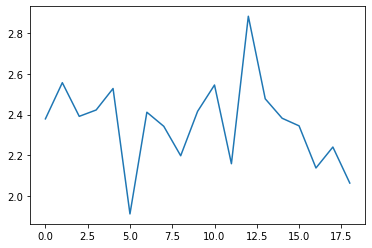

In [9]:
trace = getattr(ftClass, 'BER029_M1S0_L_3')
plt.plot(trace.fts.tapRMS[1:20])
plt.show()

In [12]:
importlib.reload(postExtrCalc)

for m in ['regr_slope', 'diff_in_mean']:
    print(m, postExtrCalc.ft_decrement(
        ft_array=trace.fts.tapRMS[1:20],
        method=m,
    ))

regr_slope -0.008204035455351415
diff_in_mean -0.09018290223076729


In [6]:
import tap_plotting.retap_check_taps as plot_taps

In [13]:
# ### PLOT DETECTED TAPS for all Traces and save figures
# importlib.reload(plot_taps)
# plot_taps.plot_detected_taps(ftClass)

### 2b. Visualise Features as Group with Boxplots

In [5]:
import tap_plotting.retap_visualise_fts as retapViz

In [16]:
### GET GLOBAL SUMMARY
# 
# 21 blocks false positive, missed 1
# blocks without taps

block_durations = []
ntaps = []
subs = []
scores = []

for trace in ftClass.incl_traces:
    subs.append(getattr(ftClass, trace).sub)
    scores.append(getattr(ftClass, trace).tap_score)

    try:
        ntaps.append(getattr(ftClass, trace).fts.total_nTaps)
        block_durations.append(getattr(ftClass, trace).acc_sig.shape[1] / 250)
        
    except AttributeError:
        print(trace)
print()
print(f'UPDRS subscores: {np.unique(scores, return_counts=True)}')
print(f'In {len(np.unique(subs))} unique subjects, {len(ftClass.incl_traces)} tap blocks found')
print(f'block durations: {np.mean(block_durations)} +/- {np.std(block_durations)}')
print(f'n taps: {np.mean(ntaps)} +/- {np.std(ntaps)}')


UPDRS subscores: (array([0, 1, 2, 3, 4]), array([ 40, 154, 122,  57,   3], dtype=int64))
In 37 unique subjects, 376 tap blocks found
block durations: 11.843691489361703 +/- 2.560180585080951
n taps: 29.0718085106383 +/- 11.186649191493608


In [499]:
importlib.reload(retapViz)

fts_include = [
    'mean_tapRMSnrm', 'coefVar_tapRMSnrm', 'decr_tapRMSnrm', 'slope_tapRMSnrm',
    'mean_intraTapInt', 'coefVar_intraTapInt', 'decr_intraTapInt', 'slope_intraTapInt',
    'mean_jerkiness', 'coefVar_jerkiness', 'decr_jerkiness', 'slope_jerkiness'
]

tempScoreDict, fts_include = retapViz.sort_fts_on_tapScore(
    ftClass=ftClass,
)

retapViz.plot_boxplot_feats_per_subscore(
    fts_include=fts_include,
    sorted_feat_dict=tempScoreDict,
    plot_title='ReTap DUS and BER',# and DUS',
    figsave_name=f'retap_fullCohort_{merge_meth}_v2',
    figsave_dir=os.path.join(
        utils_dataManagement.find_onedrive_path('figures'),
        'fts_boxplots',
    ),
    show=False,
)


(mean_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(mean_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(mean_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(coefVar_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(coefVar_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(coefVar_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(decr_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(decr_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(decr_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)
(slope_tapRMSnrm)	0 taps available for BER023_M1S0_R_3 (tap-subscore: 3)
(slope_tapRMSnrm)	0 taps available for DUS022_M0S0_L_1 (tap-subscore: 3)
(slope_tapRMSnrm)	0 taps available for DUS006_M0S0_L_1 (tap-subscore: 2)


### 2c. Visualise Slow vs Fast Tappers

In [6]:
fig_path_1D = utils_dataMn.find_onedrive_path('figures')
import datetime as dt

In [8]:
ft_select = 'freq'   #  intraTapInt, freq, total_nTaps, tapRMSnrm
aggr_meth = 'mean'  # mean, std dev, coef of var
y_label = ft_select

traces_excl = [
    'DUS006_M0S0_L_1',
]

totalFreq = []
totalTaps = []
scores, values = [], []



box_lists = {}
for i in range(5): box_lists[i] = []

for trace in ftClass10.incl_traces:
    
    if trace in traces_excl: continue

    trace = getattr(ftClass10, trace)
    value = getattr(trace.fts, ft_select)
    
    if type(value) == np.ndarray:
        if aggr_meth == 'mean': value = np.nanmean(value)
        elif aggr_meth == 'std dev': value = np.nanstd(value)
        elif aggr_meth == 'coef of var': value = scipy.stats.variation(value)

        y_label = f'{aggr_meth} {ft_select}'
    values.append(value)

    score = getattr(trace, 'tap_score')
    scores.append(score)

    box_lists[score].append(value)

box_lists = [box_lists[i] for i in range(5)]


In [191]:
fs = 14  # fontsize

box_lists = retapViz.clean_list_of_lists(box_lists)

plt.figure(figsize=(8, 6))

plt.boxplot(box_lists)

plt.ylabel(y_label, size=fs)

plt.xticks(range(1, 6), labels=range(5))
plt.xlabel('UPDRS tap score', size=fs)

plt.tick_params(axis='both', size=fs, labelsize=fs)

# plt.ylim(0, 1.5)

dd = str(dt.date.today().day).zfill(2)
mm = str(dt.date.today().month).zfill(2)
figname = (
    f'{dt.date.today().year}{mm}{dd}'
    f'_ftBoxplot_10taps_{y_label}'
)

# plt.savefig(
#     os.path.join(fig_path_1D, 'fts_boxplots', figname),
#     dpi=150, facecolor='w',)

plt.show()

#### PLOT CLUSTERS OF FAST / SLOW TAPPERS

In [20]:
import tap_plotting.retap_plot_clusters as plot_cluster
import tap_predict.tap_pred_prepare as pred_prep

In [28]:
importlib.reload(pred_prep)

# create matrix to cluster with
traces_excl = [
    'DUS006_M0S0_L_1',
]

ft_sel = [
    'mean_intraTapInt',
    'coefVar_intraTapInt',
    'freq'
]

X, y = pred_prep.create_X_y_vectors(
    ftClass=ftClass,
    incl_feats=ft_sel,
    incl_traces=ftClass.incl_traces,
    excl_traces=traces_excl,
    to_zscore=True,
)


## MASKING BCS TOO LOW NUMBERS
# UPDRS 4 -> 3 merge (4: n=3)
mask = y == 4
y[mask] = 3

# # UPDRS 0 -> 1 merge (0: n=40)
# mask = y == 0
# y[mask] = 1

# of NaNs per feat: [0 0 0]


In [32]:
importlib.reload(plot_cluster)
importlib.reload(postExtrCalc)

n_clusters = 2

plot_cluster.plot_cluster_kMeans(
    X=X, y=y, n_clusters=n_clusters,
    use_pca=True,
    z_score=True,
    alt_labels=['mean ITI', 'cv ITI'],
    show=False,
    # figsave_dir=os.path.join(fig_path_1D, 'clustering'),
    # figsave_name=(
    #     f'{dt.date.today().year}{mm}{dd}'
    #     f'_{n_clusters}clusters_M_CV_iti_'   # freq
    # ),
)

y_clust, centr_clust, _ = plot_cluster.get_kMeans_clusters(
    X=X,
    n_clusters=n_clusters,
    use_pca=True,
    z_score=True,
)

c:\Users\habetsj\Anaconda3\envs\retap\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\habetsj\Anaconda3\envs\retap\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [31]:
# plot distribution of tap-sub-scores in clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

fs=16

if n_clusters == 3:
    widths = [.3, -.3, .3]
    aligns = ['left', 'mid', 'mid']
elif n_clusters == 2:
    widths = [-.3, .3]
    aligns = ['mid', 'mid']



for n_cl in range(n_clusters):

    clust_y = y[y_clust == n_cl] 
    plt.hist(
        clust_y,
        bins=np.arange(5),
        width=widths[n_cl],
        align=aligns[n_cl],
        label=f'Cluster {n_cl + 1}\n(n={len(clust_y)})')

# plt.hist(
#     y[y_clust == 1],
#     align='right',
#     label=f'Cluster 2 (n={})')

plt.ylabel('n Observations (10-s traces)', size=fs,)
plt.xlim(-.5, 4)

plt.xticks(np.arange(4), labels=['0', '1', '2', '3 + 4'])
plt.xlabel('UPDRS sub tap score', size=fs,)

plt.legend(fontsize=fs, frameon=False,)

plt.tick_params(axis='both', size=fs, labelsize=fs)

for side in ['top', 'right']: ax.spines[side].set_color('none')

dd = str(dt.date.today().day).zfill(2)
mm = str(dt.date.today().month).zfill(2)
figname = (
    f'{dt.date.today().year}{mm}{dd}'
    f'_{n_clusters}clusters_M_CV_iti_scores'  # freq
)

# plt.savefig(
#     os.path.join(fig_path_1D, 'clustering', figname),
#     dpi=150, facecolor='w',)

plt.tight_layout()

plt.close()

### 3. Visualise single Features over Tap-course


still to adapt to current feature class objects